In [2]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [16]:
#import 2018 data

csvpath_2018 = os.path.join('Resources', '2018.csv')
csv_2018 = pd.read_csv(csvpath_2018)
csv_2018.head(15)
csv_2018.dropna(how="all")

#import happy_region df so we can merge and make region column

csvpath_region = os.path.join('happy_regions.csv')
csv_happy_regions = pd.read_csv(csvpath_region)

#lets take out just country and region columns
new_region_df = csv_happy_regions[["Country", "Region"]]

#rename column so it matches with the newly structured csv below
new_region_df = new_region_df.rename(columns={"Country": "Country or region"})

#let's merge df with region category with csv 2018
merged_2018 = pd.merge(csv_2018, new_region_df, on="Country or region")
merged_2018

#write it as csv so we can look at it
#output file for data
output_file = os.path.join("2018_csv_regions.csv")
#open output file
with open(output_file, 'w') as datafile:
    merged_2018.to_csv(output_file)

merged_2018.head(10)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Europe
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295,Europe
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291,North America
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,Australia and New Zealand
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,Europe
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302,Australia and New Zealand


slope:0.28
intercept:-0.61
R-squared: 0.6572
y=0.28x + -0.61


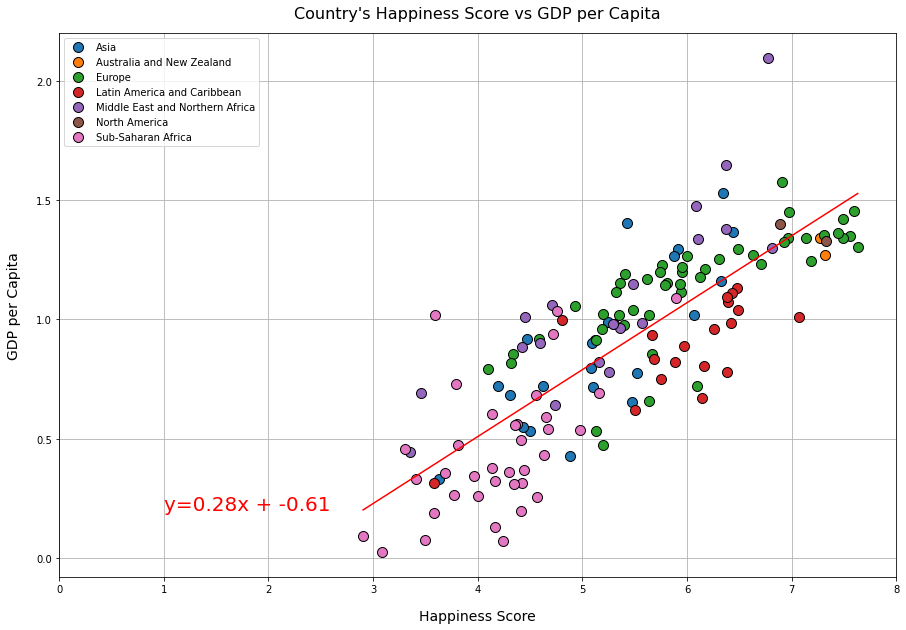

In [17]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["GDP per capita"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1,0.2), fontsize =20, color = "red")
plt.show()

slope:0.2
intercept:0.14
y=0.2x + 0.14


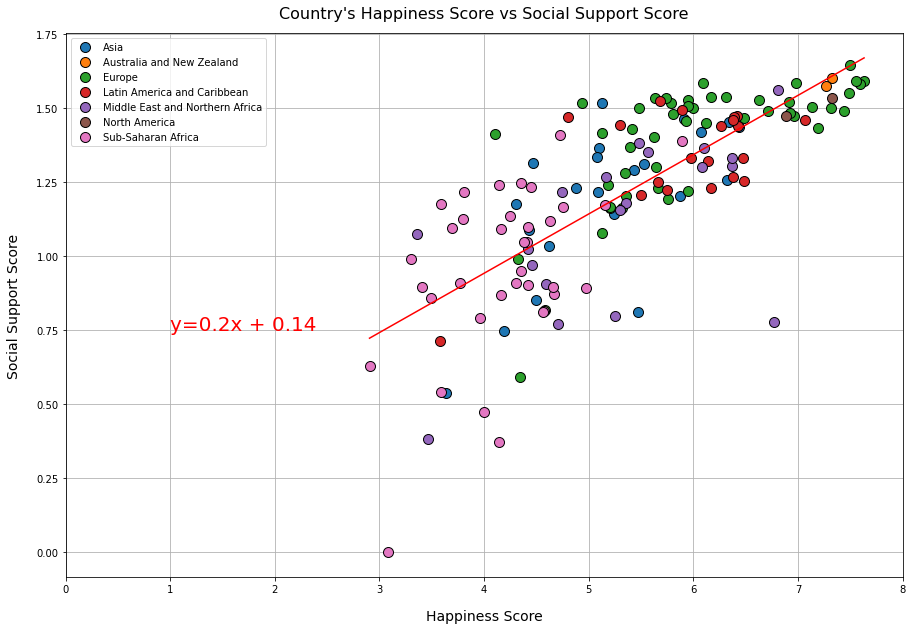

In [18]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["Social support"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.75), fontsize =20, color = "red")
plt.show()

slope:0.17
intercept:-0.31
R-squared: 0.6115
y=0.17x + -0.31


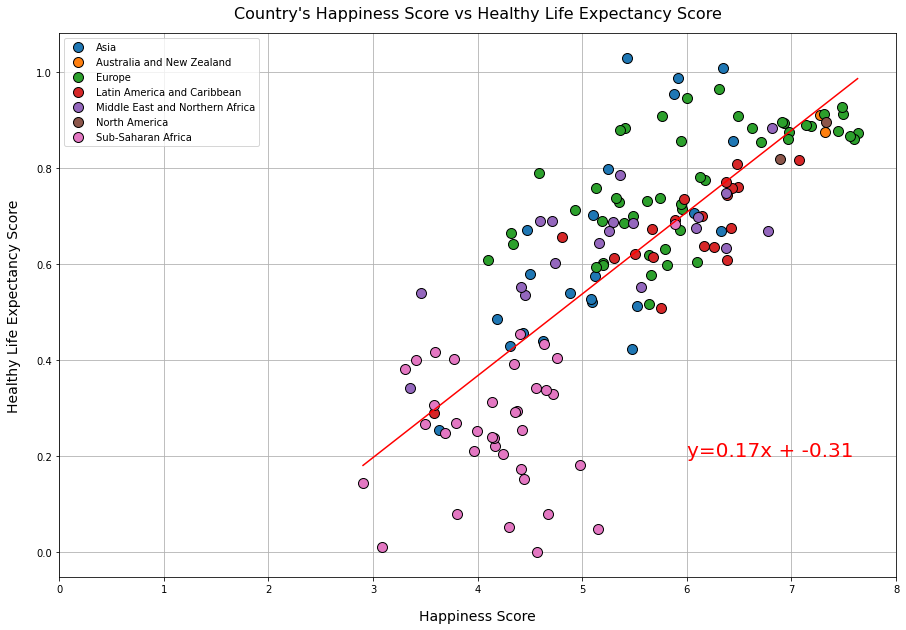

In [19]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["Healthy life expectancy"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
  
    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.08
intercept:0.03
R-squared: 0.2913
y=0.08x + 0.03


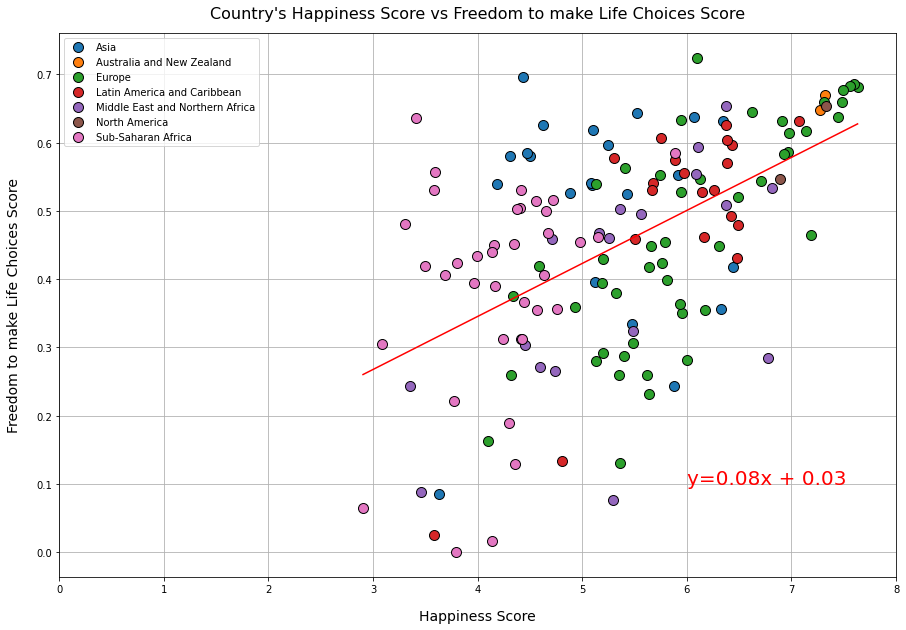

In [20]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["Freedom to make life choices"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
   
    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.1), fontsize =20, color = "red")
plt.show()

slope:0.01
intercept:0.11
y=0.01x + 0.11


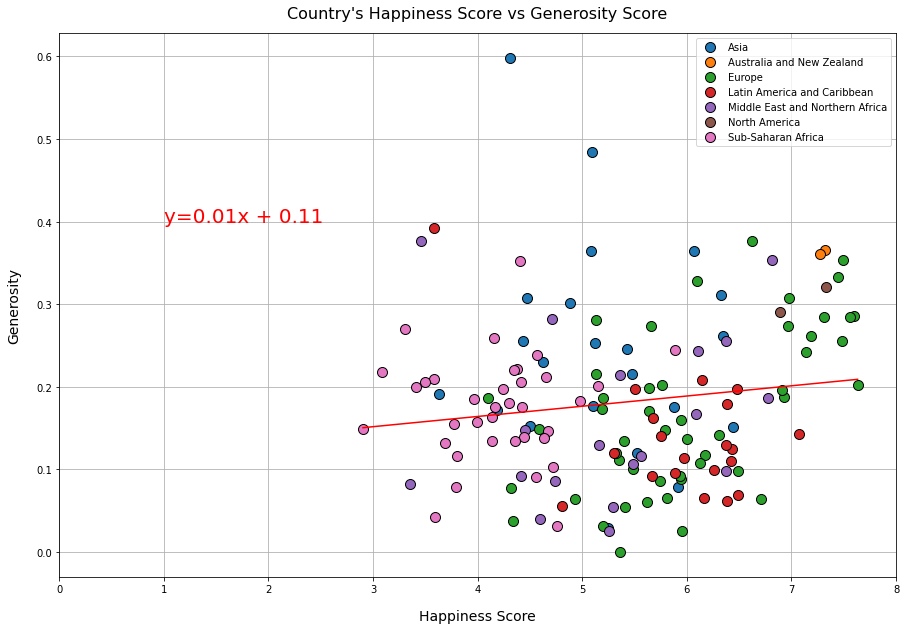

In [21]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["Generosity"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
  
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.4), fontsize =20, color = "red")
plt.show()

slope:nan
intercept:nan
R-squared: nan
y=nanx + nan


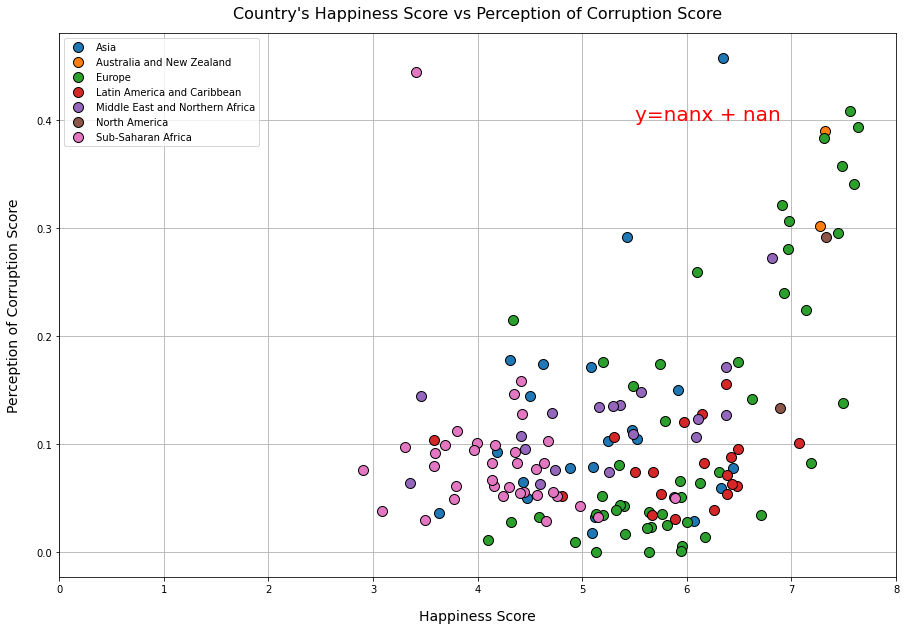

In [24]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = merged_2018["Score"]
y_values = merged_2018["Perceptions of corruption"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2018["Country or region"]
region = merged_2018["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.5, 0.4), fontsize =20, color = "red")
plt.show()